exam score prediction

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
!pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable


In [5]:
%pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Point to the specific file inside the dataset
file_path = "Exam_Score_Prediction.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kundanbedmutha/exam-score-prediction-dataset",
  file_path,
)

print(df.head())

c:\Users\Remaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Remaa\AppData\Local\Temp\ipykernel_17168\1504882150.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        moderate        54.8  
2       

In [7]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [9]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [10]:
# Select only columns that contain text (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'gender':
['male' 'other' 'female']
------------------------------
Unique values in 'course':
['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
------------------------------
Unique values in 'internet_access':
['yes' 'no']
------------------------------
Unique values in 'sleep_quality':
['poor' 'average' 'good']
------------------------------
Unique values in 'study_method':
['coaching' 'online videos' 'mixed' 'self-study' 'group study']
------------------------------
Unique values in 'facility_rating':
['low' 'medium' 'high']
------------------------------
Unique values in 'exam_difficulty':
['hard' 'moderate' 'easy']
------------------------------


we assign numbers that represent a "scale" (0 or 1 to 3)

In [11]:
# Mapping for ranked variables
ordinal_mapping = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
    'internet_access': {'no': 0, 'yes': 1}
}

# Apply the mapping
for col, val_map in ordinal_mapping.items():
    df[col] = df[col].map(val_map)

One-Hot Encoding for Nominal Data

In [12]:
# Convert remaining text columns into 0 and 1 columns
df_final = pd.get_dummies(df, columns=['gender', 'course', 'study_method'], drop_first=True)

# Display the first few rows to see the new structure
print(df_final.head())

   student_id  age  study_hours  class_attendance  internet_access  \
0           1   17         2.78              92.9                1   
1           2   23         3.37              64.8                1   
2           3   22         7.88              76.8                1   
3           4   20         0.67              48.4                1   
4           5   20         0.89              71.6                1   

   sleep_hours  sleep_quality  facility_rating  exam_difficulty  exam_score  \
0          7.4              1                1                3        58.9   
1          4.6              2                2                2        54.8   
2          8.5              1                3                2        90.3   
3          5.8              2                1                2        29.7   
4          9.8              1                1                2        43.7   

   ...  course_b.sc  course_b.tech  course_ba  course_bba  course_bca  \
0  ...        False          Fa

In [13]:
df_final.head()

,student_id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,...,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,1,17,2.78,92.9,1,7.4,1,1,3,58.9,...,False,False,False,False,False,True,False,False,False,False
1,2,23,3.37,64.8,1,4.6,2,2,2,54.8,...,False,False,False,False,True,False,False,False,True,False
2,3,22,7.88,76.8,1,8.5,1,3,2,90.3,...,True,False,False,False,False,False,False,False,False,False
3,4,20,0.67,48.4,1,5.8,2,1,2,29.7,...,False,False,False,False,False,True,False,False,True,False
4,5,20,0.89,71.6,1,9.8,1,1,2,43.7,...,False,False,False,False,False,True,False,False,False,False


Distribution of the Target (exam_score)

In [14]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


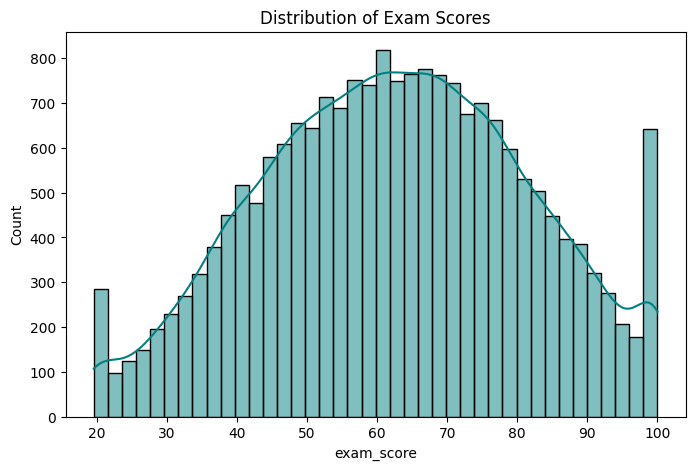

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_final['exam_score'], kde=True, color='teal')
plt.title('Distribution of Exam Scores')
plt.show()

Correlation Heatmap
Close to 1: As the feature goes up, the score goes up (e.g., Study Hours).

Close to -1: As the feature goes up, the score goes down (e.g., Difficulty).

Close to 0: The feature has almost no impact on the score.

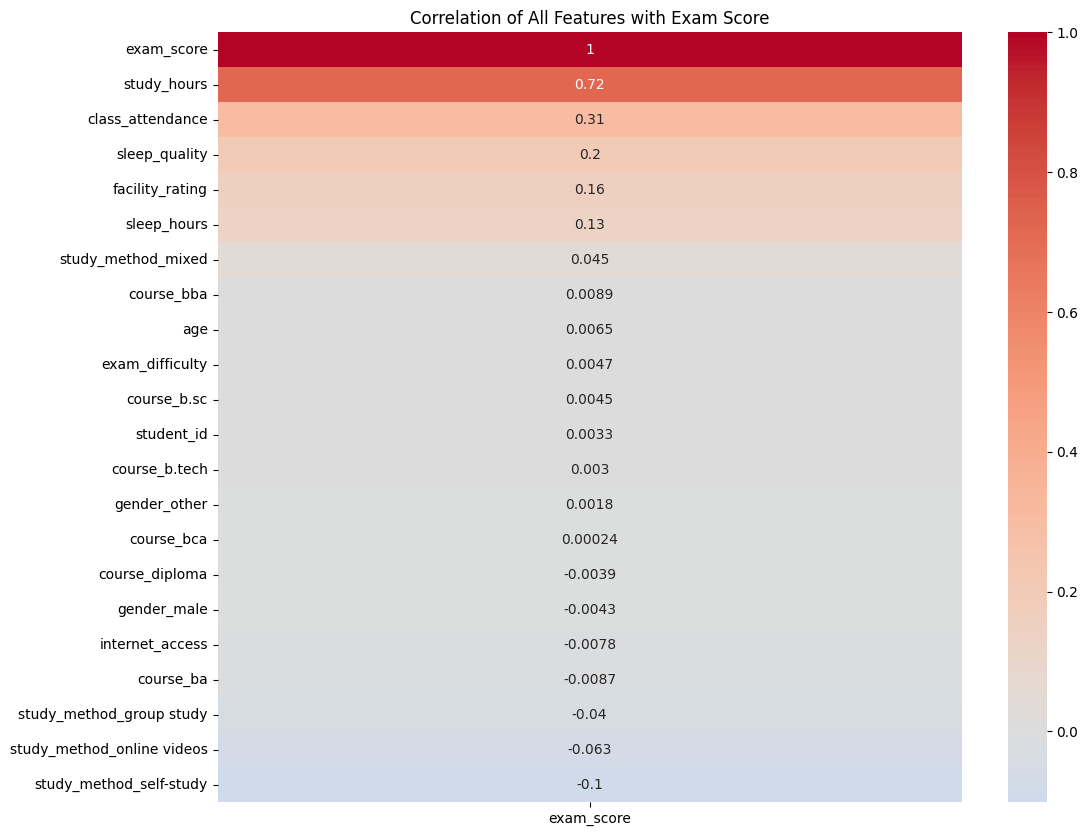

In [16]:
plt.figure(figsize=(12, 10))
# Calculate correlation
corr = df_final.corr()
# Plot heatmap
sns.heatmap(corr[['exam_score']].sort_values(by='exam_score', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of All Features with Exam Score')
plt.show()

for Linear Regression: Feature SelectionBased on the Correlation Heatmap, I decided to focus only on high-impact features and ignore "noise" variables with correlations close to zero (between $0.045$ and $-0.063$).Features Kept:study_hours (Strongest Predictor: 0.72)class_attendancesleep_hours & sleep_qualityfacility_ratingstudy_method_self-study

Study Hours vs. Score (with Regression Line)

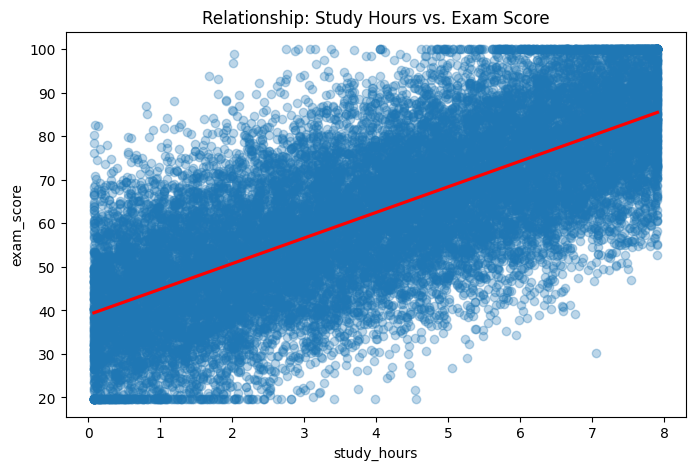

In [17]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df_final, x='study_hours', y='exam_score', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship: Study Hours vs. Exam Score')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = df_final['exam_score']

# --- VERSION 1: High-Impact Subset (For Linear/Ridge/Lasso) ---
linear_features = ['study_hours', 'class_attendance', 'sleep_hours', 
                   'sleep_quality', 'facility_rating', 'study_method_self-study']
X_linear = df_final[linear_features]

X_train_lin, X_test_lin, y_train, y_test = train_test_split(
    X_linear, y, test_size=0.2, random_state=42
)

# --- VERSION 2: All Features (For Decision Tree/Random Forest) ---
X_forest = df_final.drop(['exam_score', 'student_id'], axis=1)

X_train_rf, X_test_rf, _, _ = train_test_split(
    X_forest, y, test_size=0.2, random_state=42
)

print("Data splits created successfully!")

Data splits created successfully!


In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Dictionary of models with different characteristics
models = {
    "Linear Regression (Subset)": LinearRegression(),
    "Ridge (Subset)": Ridge(alpha=1.0), 
    "Lasso (Subset)": Lasso(alpha=0.1),
    "Decision Tree (Full)": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest (Full)": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [20]:
import pandas as pd

# Initialize Models
models = {
    "Linear Regression (Subset)": LinearRegression(),
    "Ridge (Subset)": Ridge(alpha=1.0), 
    "Lasso (Subset)": Lasso(alpha=0.1),
    "Decision Tree (Full)": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest (Full)": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    # Select the correct split based on the model type
    if "(Subset)" in name:
        X_train_current, X_test_current = X_train_lin, X_test_lin
    else:
        X_train_current, X_test_current = X_train_rf, X_test_rf
    
    # 5-Fold Cross Validation
    cv_scores = cross_val_score(model, X_train_current, y_train, cv=5, scoring='r2')
    
    # Train and test
    model.fit(X_train_current, y_train)
    test_score = model.score(X_test_current, y_test)
    
    results.append({
        "Model": name,
        "CV R2 Mean": cv_scores.mean(),
        "Test R2": test_score
    })

# Format and display the results
results_df = pd.DataFrame(results).sort_values(by="Test R2", ascending=False)
print(results_df)

                        Model  CV R2 Mean   Test R2
0  Linear Regression (Subset)    0.705056  0.708061
1              Ridge (Subset)    0.705056  0.708060
2              Lasso (Subset)    0.704794  0.707464
4        Random Forest (Full)    0.685137  0.687346
3        Decision Tree (Full)    0.600687  0.605370


In [ ]:
# After your loop finishes:
best_model_entry = max(results, key=lambda x: x['Test R2'])

print(" BEST MODEL PERFORMANCE ")
print(f"Model Name: {best_model_entry['Model']}")
print(f"Test R2 Score: {best_model_entry['Test R2']:.4f}")
print(f"Cross-Validation R2: {best_model_entry['CV R2 Mean']:.4f}")

---  BEST MODEL PERFORMANCE 
Model Name: Linear Regression (Subset)
Test R2 Score: 0.7081
Cross-Validation R2: 0.7051


improve  Random Forest, we to combine Hyperparameter Tuning with Cross-Validation :)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [100, 300, 500],           
    'max_depth': [None, 10, 20, 30],           
    'min_samples_split': [2, 5, 10],           
    'max_features': ['sqrt', 'log2', None]     
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=2  


grid_search.fit(X_train_rf, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV R2 Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

take lomg time !!

In [ ]:

best_rf = grid_search.best_estimator_


final_pred = best_rf.predict(X_test_rf)

from sklearn.metrics import r2_score, mean_absolute_error
print(f"Final Tuned Test R2: {r2_score(y_test, final_pred):.4f}")
print(f"Final Tuned MAE: {mean_absolute_error(y_test, final_pred):.2f}")

Save a trained Linear Regression model 

In [23]:
import joblib
from sklearn.linear_model import LinearRegression


lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train)


joblib.dump(lin_model, "linear_regression_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [24]:
import joblib

# Load the model
loaded_model = joblib.load("linear_regression_model.pkl")

# Use it to predict or evaluate
y_pred = loaded_model.predict(X_test_lin)
score = loaded_model.score(X_test_lin, y_test)
print("R2 on test set:", score)


R2 on test set: 0.7080613138593272
